In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("./Data/ClusterData2.csv")

In [4]:
from sklearn import compose
from sklearn import preprocessing

In [5]:
# preprocess the data by encoding the categorical Class of Orbit feature as a one-hot vector 
# and scaling the numerical features to standardize them
preprocess = compose.make_column_transformer(
    ('passthrough', ['NORAD_CAT_ID']),
    (preprocessing.StandardScaler(), ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 
                                     'MEAN_ANOMALY', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOGEE', 'PERIGEE']),
)

In [6]:
dataset_final = pd.DataFrame(preprocess.fit_transform(dataset))

In [7]:
dataset_final.head()

,0,1,2,3,4,5,6,7,8,9,10
0,68.0,-2.34701,-0.149267,0.480224,-0.174617,-1.093336,1.649768,-0.092925,2.401817,-0.100683,0.492677
1,68.0,-2.34701,-0.149267,0.480171,-0.171907,-1.093336,0.005245,-0.092925,2.401817,-0.100683,0.492677
2,68.0,-2.34701,-0.149267,0.480118,-0.167759,-1.093336,-0.344656,-0.092925,2.401817,-0.100683,0.492677
3,68.0,-2.34701,-0.149267,0.480118,-0.164847,-1.093336,-0.869506,-0.092925,2.401817,-0.100683,0.492677
4,68.0,-2.34701,-0.149267,0.480118,-0.162503,-1.093336,-1.219398,-0.092925,2.401817,-0.100683,0.492677


In [8]:
x = dataset_final.iloc[:, [1, 2, 3]]

In [9]:
x.head()

,1,2,3
0,-2.34701,-0.149267,0.480224
1,-2.34701,-0.149267,0.480171
2,-2.34701,-0.149267,0.480118
3,-2.34701,-0.149267,0.480118
4,-2.34701,-0.149267,0.480118


In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [11]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)

In [12]:
PCA_components = pd.DataFrame(reduced_data)

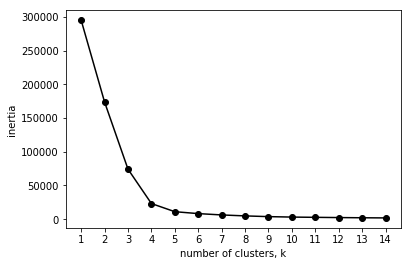

In [13]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

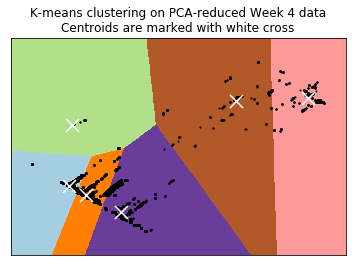

In [14]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=6)
kmeans.fit(reduced_data)
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on PCA-reduced Week 4 data\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
cluster_map = pd.DataFrame()
cluster_map['NORAD_CAT_ID'] = dataset_final.iloc[:, 0]
cluster_map['cluster'] = kmeans.labels_

In [16]:
a = [9191, 11682, 30206, 79815, 74415, 10814, 12605, 54494, 55340, 58006, 75276, 87343, 88756, 9356, 31859, 36829, 45268, 47507, 70237, 72643, 74562, 74866, 87337, 89581, 95609]
cluster_map[cluster_map.NORAD_CAT_ID.isin(a)]

,NORAD_CAT_ID,cluster
3472,9191.0,1
3473,9191.0,1
3474,9191.0,1
3475,9191.0,1
3476,9191.0,1
3477,9191.0,1
3478,9191.0,1
3479,9191.0,1
3480,9191.0,1
3481,9191.0,1


In [17]:
cluster_map[cluster_map.cluster == 2]

,NORAD_CAT_ID,cluster
104310,36064.0,2
104311,36064.0,2
104312,36064.0,2
104313,36064.0,2
104314,36064.0,2
104315,36064.0,2
104316,36064.0,2
104317,36064.0,2
104341,99921.0,2
104342,99921.0,2


In [18]:
constellation = cluster_map[cluster_map.cluster==2]